<img src="./img/HWNI_logo.svg"/>

# Plotting Tidy and Messy Data

In [165]:
#use this magic for inline plotting
%matplotlib inline

# necessary imports for plotting with seaborn
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
sns.set_palette("Set2")

#push helper functions to separate module
import util.plots as plot 

from IPython.core.display import HTML
css = open('./css/style-table.css').read() 
HTML('<style>{}</style>'.format(css)) #import css styling for tables; has to be last

### Problem 1 - Loading Data

The following DataFrame is "tidy" -- each row is an observation, with data and metadata both represented, for a given observation, in the same row, and columns are variables.

In [173]:
tidyData = pd.read_csv('./data/2_1_tidy.csv')

tidyData.head()

,SucrConsump,Injection,Exp_Idx
0,21.7,Saline,1
1,17.0,Saline,1
2,11.1,Saline,1
3,6.3,Saline,1
4,19.3,Saline,1


This DataFrame is "messy", because rows don't correspond to observations. Instead, this DataFrame is acting more like a matrix or array of data, with each column corresponding to a meaningful chunk of data. Column names are variables -- and worse, they reflect both injection type and experiment index.

In [116]:
messyData = pd.read_csv('./data/2_1.csv')

messyData.head()

,Saline_1,Parg,PargYomb,Saline_2
0,21.7,49.1,8.7,4.4
1,17.0,36.9,12.1,21.1
2,11.1,41.0,3.3,20.7
3,6.3,33.8,10.7,19.8
4,19.3,56.8,22.6,16.2


### Problem 2 - Plotting Data

#### Plotting messy data is easy with pandas

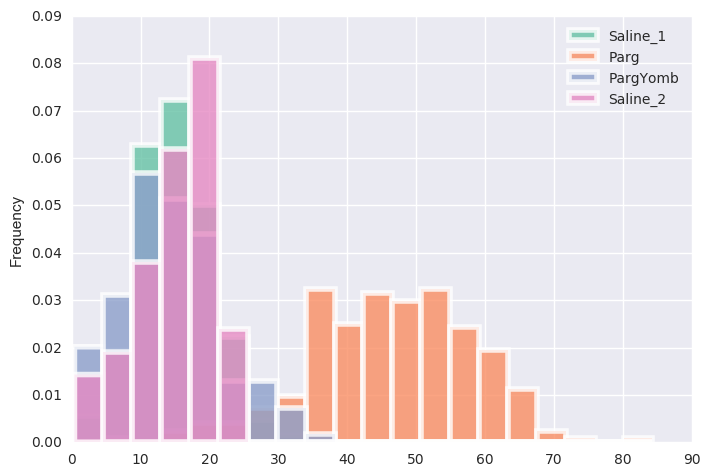

In [174]:
messyData.plot(kind="hist",
                    linewidth=4,
                    alpha=0.8,
                    bins=20,
                    edgecolor='white',
                      normed=True);

#### But plotting tidy data is hard

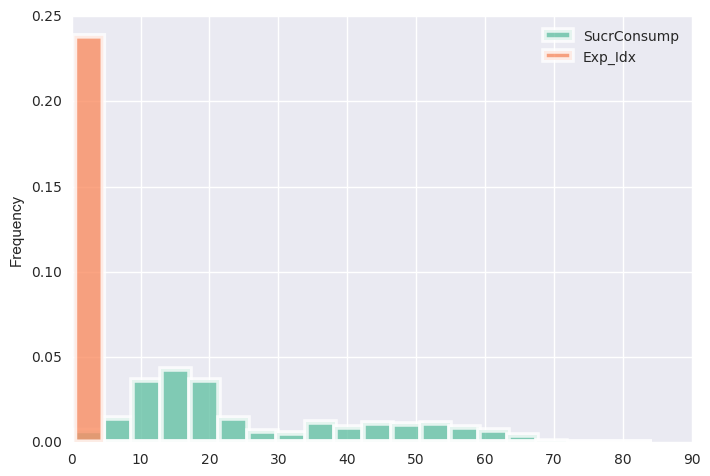

In [156]:
tidyData.plot(kind="hist",
                    linewidth=4,
                    alpha=0.8,
                    bins=20,
                    edgecolor='white',
                      normed=True);

#### We can get a facsimile of what we desire with more work

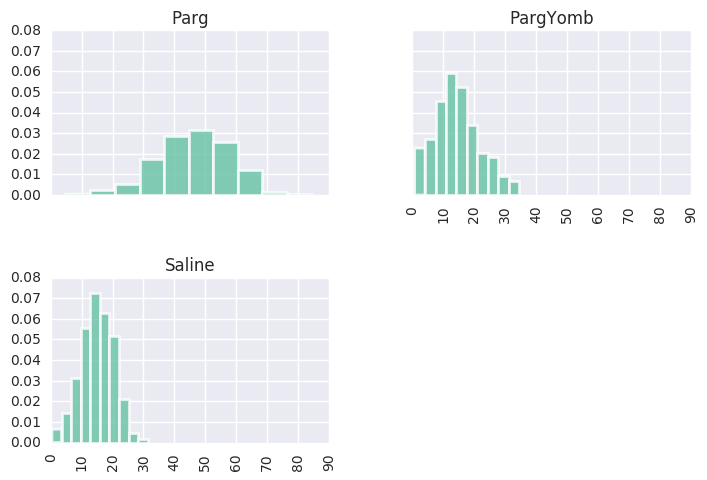

In [157]:
tidyData[["SucrConsump","Injection"]].hist(
                by="Injection",
                linewidth=2,
                alpha=0.8,
                bins=10,
                sharex=True,
                sharey=True,
                edgecolor='white',
                normed=True);

#### Attempting to layer plots doesn't work

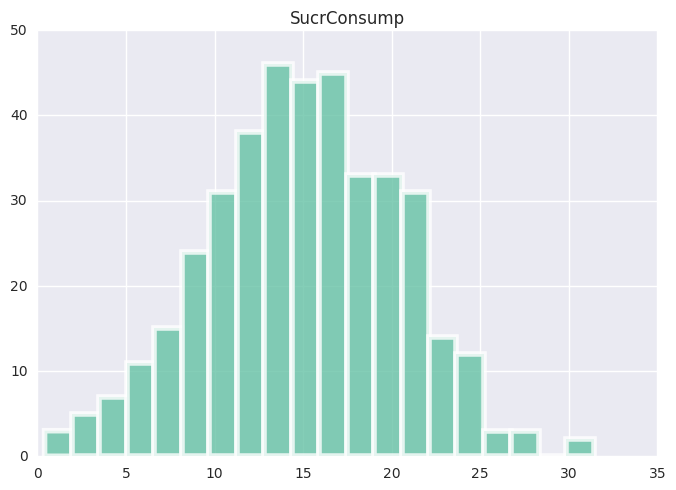

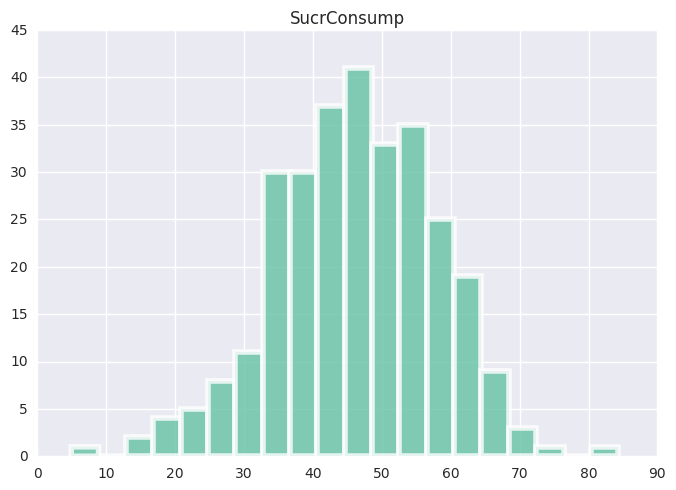

In [158]:
salineConsump = tidyData[tidyData.Injection == "Saline"][["SucrConsump"]]
pargConsump = tidyData[tidyData.Injection == "Parg"][["SucrConsump"]]

salineConsump.hist(linewidth=4,
                    alpha=0.8,
                    bins=20,
                    edgecolor='white');

pargConsump.hist(linewidth=4,
                    alpha=0.8,
                    bins=20,
                    edgecolor='white');

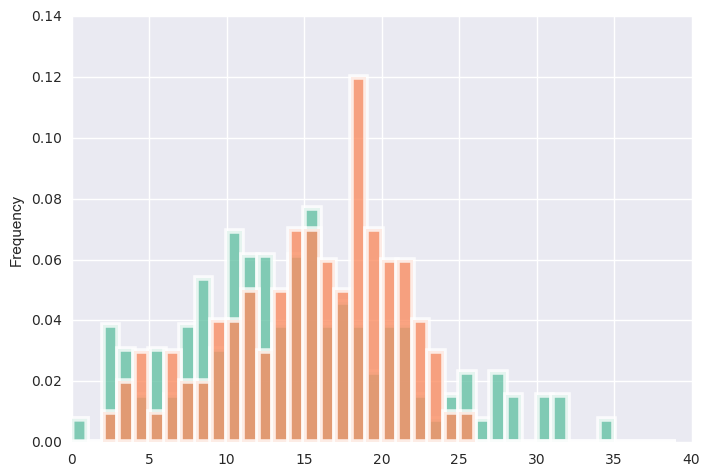

In [183]:
tidyData[tidyData.Exp_Idx == 2].groupby('Injection')['SucrConsump'].plot.hist(
                    linewidth=4,
                    alpha=0.8,
                    bins=range(0,40,1),
                    edgecolor='white',
                    normed=True);

In [179]:
type(tidyData[tidyData.Exp_Idx == 1].groupby('Injection')["SucrConsump"])

pandas.core.groupby.SeriesGroupBy

#### Seaborn does what we want with tidy data

But it takes more effort

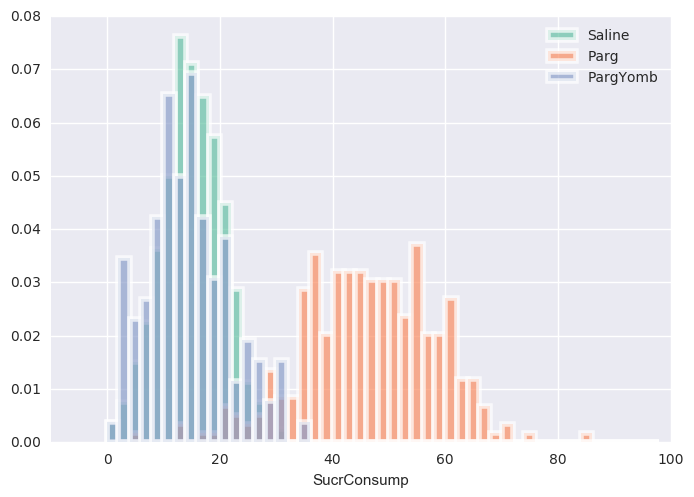

In [176]:
hist_parameters = {"linewidth":4,
                    "edgecolor":"white",
                    "alpha":0.7}

kde_parameters = {"linestyle":"none"}

injectionStrings = tidyData.Injection.unique()

groups = [tidyData[tidyData.Injection == injectionString]
             for injectionString in injectionStrings]

plots = []

for group,label in zip(groups,injectionStrings):
    
    plots.append(sns.distplot(group.SucrConsump,
                kde=True,hist=True,rug=False,
                  bins=range(0,100,2),
                   hist_kws=hist_parameters,
                    kde_kws=kde_parameters,
                     label=label))
    
plt.legend(loc='best');
plots[1].set_xlim((-10,100));

#### Addendum - Other plots

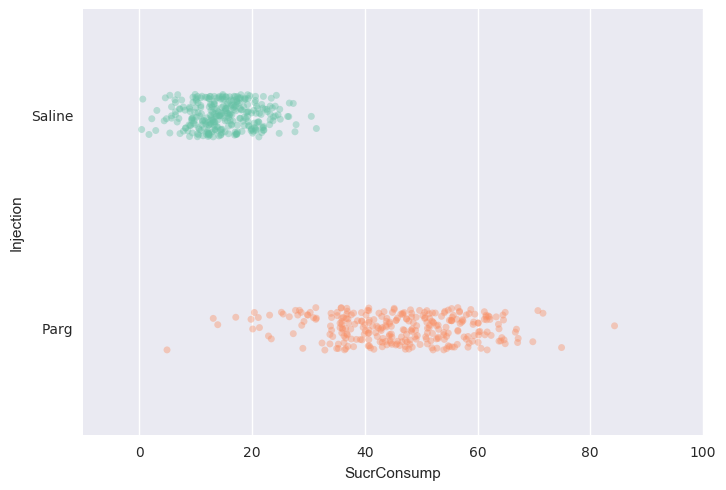

In [161]:
plot = sns.stripplot(x="SucrConsump",y="Injection",data=tidyExperiment1,
              jitter=True,alpha=0.4);
plot.set_xlim(-10,100);

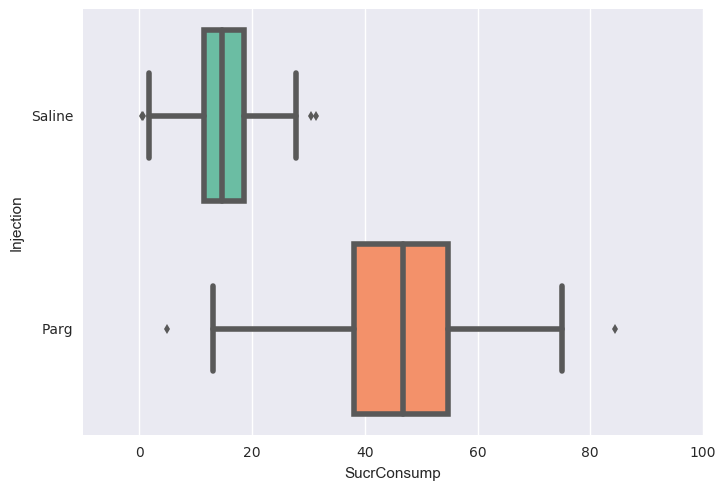

In [162]:
plot = sns.boxplot(y="Injection",x="SucrConsump",data=tidyExperiment1,
           linewidth=4,saturation=0.9)
plot.set_xlim(-10,100);

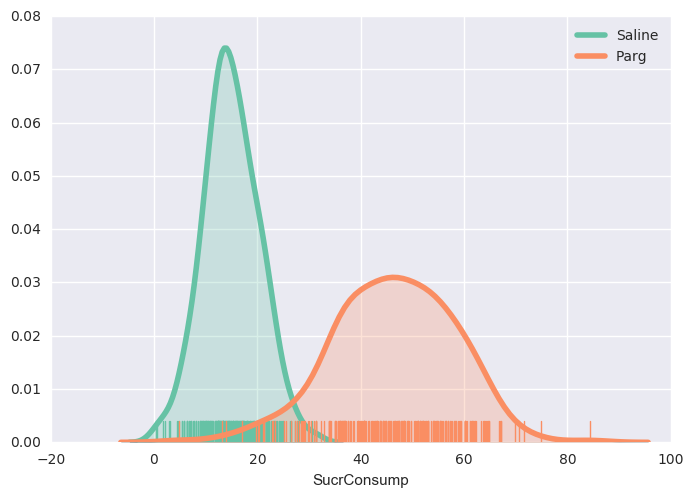

In [98]:
kde_kws = {"linewidth":4,
          "shade":True}

injectionStrings = tidyExperiment1.Injection.unique()

groups = [tidyExperiment1[tidyExperiment1.Injection == injectionString]
             for injectionString in injectionStrings]

plots = []
for group,label in zip(groups,injectionStrings):
    plots.append(sns.distplot(group.SucrConsump,
                hist=False,rug=True,
                   kde_kws=kde_kws,
                     label=label))

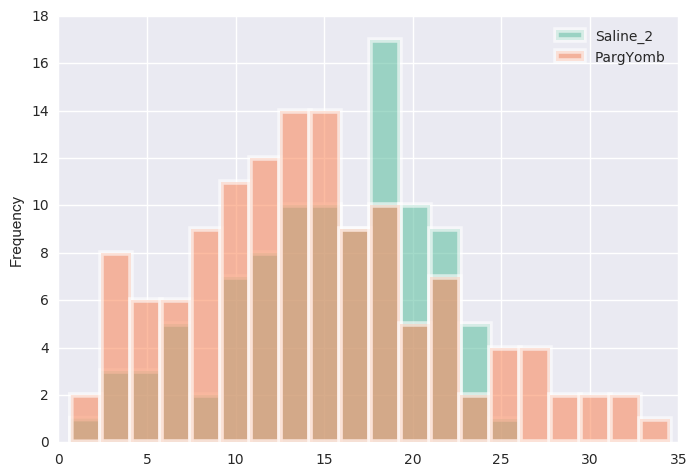

In [123]:
experiment2 = messyData[['Saline_2','PargYomb']]

experiment2.plot(kind="hist",
                    linewidth=4,
                    alpha=0.6,
                    bins=20,
                    edgecolor='white');